In [1]:
#!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import time
from catboost import Pool
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
test = pd.read_csv('./data/test.csv')

In [4]:
# 환불/환불한 구매내역 삭제한 데이터
df = pd.read_pickle('./data/data_2.pkl')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8025045 entries, 826307 to 8851351
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   month_id                    int8   
 1   shop_id                     int8   
 2   item_id                     int16  
 3   cnt_month                   float32
 4   city_id                     int8   
 5   cat_id                      int8   
 6   main_cat                    int8   
 7   sub_cat                     int8   
 8   year                        int16  
 9   month                       int8   
 10  sales_month                 int8   
 11  cnt_month_1                 float32
 12  cnt_month_2                 float32
 13  cnt_month_3                 float32
 14  item_id_mean_cnt_1          float32
 15  item_id_mean_cnt_2          float32
 16  item_id_mean_cnt_3          float32
 17  sub_cat_mean_cnt_1          float32
 18  sub_cat_mean_cnt_2          float32
 19  sub_cat_mean_cnt

In [6]:
df.head()

,month_id,shop_id,item_id,cnt_month,city_id,cat_id,main_cat,sub_cat,year,month,...,sub_cat_mean_cnt_3,price_mean_mean_cnt_1,price_mean_mean_cnt_2,price_mean_mean_cnt_3,item_id/city_id_mean_cnt_1,item_id/city_id_mean_cnt_2,item_id/city_id_mean_cnt_3,shop_id/cat_id_mean_cnt_1,shop_id/cat_id_mean_cnt_2,shop_id/cat_id_mean_cnt_3
826307,3,25,8092,3.0,13,40,11,6,2013,4,...,0.0,1.401494,1.369542,0.0,1.000000,2.142857,0.0,1.088162,1.048877,0.0
826308,3,25,7850,3.0,13,30,8,54,2013,4,...,0.0,1.482536,1.464628,0.0,3.714286,2.285714,0.0,3.675141,2.277354,0.0
826309,3,25,8051,3.0,13,66,14,47,2013,4,...,0.0,0.000000,0.000000,0.0,0.000000,0.428571,0.0,1.827586,1.389474,0.0
826310,3,25,8088,1.0,13,55,13,4,2013,4,...,0.0,1.482536,0.000000,0.0,0.285714,0.000000,0.0,0.599068,0.559843,0.0
826311,3,25,8089,1.0,13,55,13,4,2013,4,...,0.0,0.000000,0.000000,0.0,0.571429,0.000000,0.0,0.599068,0.559843,0.0


In [7]:
s = ['cnt_month', 'cnt_month_1','cnt_month_2', 'cnt_month_3', 'item_id_mean_cnt_1','item_id_mean_cnt_2', 'item_id_mean_cnt_3', 
        'sub_cat_mean_cnt_1','sub_cat_mean_cnt_2', 'sub_cat_mean_cnt_3', 'price_mean_mean_cnt_1',
       'price_mean_mean_cnt_2', 'price_mean_mean_cnt_3','item_id/city_id_mean_cnt_1', 'item_id/city_id_mean_cnt_2',
       'item_id/city_id_mean_cnt_3', 'shop_id/cat_id_mean_cnt_1','shop_id/cat_id_mean_cnt_2', 'shop_id/cat_id_mean_cnt_3']

In [8]:
# value clip(0~20)
df[s] = df[s].clip(0, 20)

In [9]:
# train/validation/test data split
X_train = df[df['month_id'] < 33].drop(['cnt_month'], axis=1)
Y_train = df[df['month_id'] < 33]['cnt_month']

X_valid = df[df['month_id'] == 33].drop(['cnt_month'], axis=1)
Y_valid = df[df['month_id'] == 33]['cnt_month']

X_test = df[df['month_id'] == 34].drop(['cnt_month'], axis=1)

In [10]:
model = CatBoostRegressor()

In [11]:
ts = time.time()
model.fit(
    X_train, Y_train, 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)],  # 유효성 검사 데이터 세트
    )

print('소요시간: ',time.time()-ts)

Learning rate set to 0.207055
0:	learn: 1.1463975	test: 1.1463975	test1: 1.0150631	best: 1.0150631 (0)	total: 996ms	remaining: 16m 34s
1:	learn: 1.0859709	test: 1.0859709	test1: 0.9701369	best: 0.9701369 (1)	total: 2s	remaining: 16m 35s
2:	learn: 1.0443345	test: 1.0443345	test1: 0.9402416	best: 0.9402416 (2)	total: 2.96s	remaining: 16m 23s
3:	learn: 1.0115131	test: 1.0115131	test1: 0.9137284	best: 0.9137284 (3)	total: 3.92s	remaining: 16m 15s
4:	learn: 0.9903466	test: 0.9903466	test1: 0.9006521	best: 0.9006521 (4)	total: 4.83s	remaining: 16m 2s
5:	learn: 0.9752510	test: 0.9752510	test1: 0.8920014	best: 0.8920014 (5)	total: 5.81s	remaining: 16m 3s
6:	learn: 0.9630972	test: 0.9630972	test1: 0.8839386	best: 0.8839386 (6)	total: 6.81s	remaining: 16m 5s
7:	learn: 0.9537641	test: 0.9537641	test1: 0.8777455	best: 0.8777455 (7)	total: 7.73s	remaining: 15m 58s
8:	learn: 0.9475741	test: 0.9475741	test1: 0.8742322	best: 0.8742322 (8)	total: 8.63s	remaining: 15m 50s
9:	learn: 0.9414298	test: 0.941

77:	learn: 0.8772502	test: 0.8772502	test1: 0.8192458	best: 0.8192458 (77)	total: 1m 28s	remaining: 17m 29s
78:	learn: 0.8769754	test: 0.8769754	test1: 0.8191778	best: 0.8191778 (78)	total: 1m 29s	remaining: 17m 27s
79:	learn: 0.8767191	test: 0.8767191	test1: 0.8190665	best: 0.8190665 (79)	total: 1m 31s	remaining: 17m 27s
80:	learn: 0.8761383	test: 0.8761383	test1: 0.8186511	best: 0.8186511 (80)	total: 1m 32s	remaining: 17m 28s
81:	learn: 0.8759180	test: 0.8759180	test1: 0.8184444	best: 0.8184444 (81)	total: 1m 33s	remaining: 17m 27s
82:	learn: 0.8757087	test: 0.8757087	test1: 0.8184784	best: 0.8184444 (81)	total: 1m 34s	remaining: 17m 28s
83:	learn: 0.8754340	test: 0.8754340	test1: 0.8185761	best: 0.8184444 (81)	total: 1m 36s	remaining: 17m 27s
84:	learn: 0.8751362	test: 0.8751362	test1: 0.8185214	best: 0.8184444 (81)	total: 1m 37s	remaining: 17m 27s
85:	learn: 0.8749084	test: 0.8749084	test1: 0.8183341	best: 0.8183341 (85)	total: 1m 38s	remaining: 17m 24s
86:	learn: 0.8747489	test: 0

153:	learn: 0.8581543	test: 0.8581543	test1: 0.8135624	best: 0.8135624 (153)	total: 3m	remaining: 16m 31s
154:	learn: 0.8580535	test: 0.8580535	test1: 0.8134329	best: 0.8134329 (154)	total: 3m 1s	remaining: 16m 30s
155:	learn: 0.8579353	test: 0.8579353	test1: 0.8133573	best: 0.8133573 (155)	total: 3m 2s	remaining: 16m 30s
156:	learn: 0.8576058	test: 0.8576058	test1: 0.8133023	best: 0.8133023 (156)	total: 3m 4s	remaining: 16m 31s
157:	learn: 0.8574784	test: 0.8574784	test1: 0.8134024	best: 0.8133023 (156)	total: 3m 5s	remaining: 16m 30s
158:	learn: 0.8572434	test: 0.8572434	test1: 0.8131118	best: 0.8131118 (158)	total: 3m 7s	remaining: 16m 31s
159:	learn: 0.8570176	test: 0.8570176	test1: 0.8134740	best: 0.8131118 (158)	total: 3m 9s	remaining: 16m 32s
160:	learn: 0.8568848	test: 0.8568848	test1: 0.8134704	best: 0.8131118 (158)	total: 3m 10s	remaining: 16m 31s
161:	learn: 0.8567753	test: 0.8567753	test1: 0.8135634	best: 0.8131118 (158)	total: 3m 11s	remaining: 16m 30s
162:	learn: 0.856551

228:	learn: 0.8471051	test: 0.8471051	test1: 0.8145789	best: 0.8115782 (188)	total: 4m 39s	remaining: 15m 42s
229:	learn: 0.8470297	test: 0.8470297	test1: 0.8146168	best: 0.8115782 (188)	total: 4m 41s	remaining: 15m 41s
230:	learn: 0.8469318	test: 0.8469318	test1: 0.8147176	best: 0.8115782 (188)	total: 4m 42s	remaining: 15m 39s
231:	learn: 0.8467858	test: 0.8467858	test1: 0.8147177	best: 0.8115782 (188)	total: 4m 43s	remaining: 15m 38s
232:	learn: 0.8467181	test: 0.8467181	test1: 0.8148478	best: 0.8115782 (188)	total: 4m 44s	remaining: 15m 38s
233:	learn: 0.8466265	test: 0.8466265	test1: 0.8150333	best: 0.8115782 (188)	total: 4m 46s	remaining: 15m 37s
234:	learn: 0.8465073	test: 0.8465073	test1: 0.8140741	best: 0.8115782 (188)	total: 4m 47s	remaining: 15m 36s
235:	learn: 0.8464261	test: 0.8464261	test1: 0.8140000	best: 0.8115782 (188)	total: 4m 48s	remaining: 15m 35s
236:	learn: 0.8463256	test: 0.8463256	test1: 0.8141612	best: 0.8115782 (188)	total: 4m 50s	remaining: 15m 34s
237:	learn

303:	learn: 0.8388629	test: 0.8388629	test1: 0.8238444	best: 0.8115782 (188)	total: 6m 18s	remaining: 14m 27s
304:	learn: 0.8387792	test: 0.8387792	test1: 0.8238485	best: 0.8115782 (188)	total: 6m 20s	remaining: 14m 26s
305:	learn: 0.8387089	test: 0.8387089	test1: 0.8237951	best: 0.8115782 (188)	total: 6m 21s	remaining: 14m 24s
306:	learn: 0.8386025	test: 0.8386025	test1: 0.8238781	best: 0.8115782 (188)	total: 6m 22s	remaining: 14m 24s
307:	learn: 0.8385364	test: 0.8385364	test1: 0.8237867	best: 0.8115782 (188)	total: 6m 23s	remaining: 14m 22s
308:	learn: 0.8384407	test: 0.8384407	test1: 0.8238545	best: 0.8115782 (188)	total: 6m 25s	remaining: 14m 21s
309:	learn: 0.8384045	test: 0.8384045	test1: 0.8237960	best: 0.8115782 (188)	total: 6m 26s	remaining: 14m 20s
310:	learn: 0.8383646	test: 0.8383646	test1: 0.8236932	best: 0.8115782 (188)	total: 6m 28s	remaining: 14m 19s
311:	learn: 0.8382514	test: 0.8382514	test1: 0.8237282	best: 0.8115782 (188)	total: 6m 29s	remaining: 14m 18s
312:	learn

378:	learn: 0.8308501	test: 0.8308501	test1: 0.8488952	best: 0.8115782 (188)	total: 7m 59s	remaining: 13m 5s
379:	learn: 0.8307953	test: 0.8307953	test1: 0.8490186	best: 0.8115782 (188)	total: 8m	remaining: 13m 3s
380:	learn: 0.8307333	test: 0.8307333	test1: 0.8490403	best: 0.8115782 (188)	total: 8m 1s	remaining: 13m 2s
381:	learn: 0.8306416	test: 0.8306416	test1: 0.8489397	best: 0.8115782 (188)	total: 8m 2s	remaining: 13m 1s
382:	learn: 0.8305910	test: 0.8305910	test1: 0.8487596	best: 0.8115782 (188)	total: 8m 4s	remaining: 13m
383:	learn: 0.8305390	test: 0.8305390	test1: 0.8488047	best: 0.8115782 (188)	total: 8m 5s	remaining: 12m 58s
384:	learn: 0.8304934	test: 0.8304934	test1: 0.8487758	best: 0.8115782 (188)	total: 8m 6s	remaining: 12m 57s
385:	learn: 0.8304212	test: 0.8304212	test1: 0.8486822	best: 0.8115782 (188)	total: 8m 8s	remaining: 12m 56s
386:	learn: 0.8303650	test: 0.8303650	test1: 0.8487197	best: 0.8115782 (188)	total: 8m 9s	remaining: 12m 55s
387:	learn: 0.8302779	test: 0

453:	learn: 0.8246170	test: 0.8246170	test1: 0.8487773	best: 0.8115782 (188)	total: 9m 34s	remaining: 11m 30s
454:	learn: 0.8245772	test: 0.8245772	test1: 0.8475692	best: 0.8115782 (188)	total: 9m 35s	remaining: 11m 29s
455:	learn: 0.8244954	test: 0.8244954	test1: 0.8476228	best: 0.8115782 (188)	total: 9m 36s	remaining: 11m 28s
456:	learn: 0.8244668	test: 0.8244668	test1: 0.8475604	best: 0.8115782 (188)	total: 9m 38s	remaining: 11m 27s
457:	learn: 0.8244177	test: 0.8244177	test1: 0.8475352	best: 0.8115782 (188)	total: 9m 39s	remaining: 11m 25s
458:	learn: 0.8243748	test: 0.8243748	test1: 0.8474550	best: 0.8115782 (188)	total: 9m 40s	remaining: 11m 24s
459:	learn: 0.8242941	test: 0.8242941	test1: 0.8475614	best: 0.8115782 (188)	total: 9m 42s	remaining: 11m 23s
460:	learn: 0.8242318	test: 0.8242318	test1: 0.8475035	best: 0.8115782 (188)	total: 9m 43s	remaining: 11m 21s
461:	learn: 0.8241913	test: 0.8241913	test1: 0.8473347	best: 0.8115782 (188)	total: 9m 44s	remaining: 11m 20s
462:	learn

528:	learn: 0.8186389	test: 0.8186389	test1: 0.8644279	best: 0.8115782 (188)	total: 11m 9s	remaining: 9m 55s
529:	learn: 0.8185703	test: 0.8185703	test1: 0.8646092	best: 0.8115782 (188)	total: 11m 10s	remaining: 9m 54s
530:	learn: 0.8185007	test: 0.8185007	test1: 0.8649837	best: 0.8115782 (188)	total: 11m 11s	remaining: 9m 53s
531:	learn: 0.8184241	test: 0.8184241	test1: 0.8648701	best: 0.8115782 (188)	total: 11m 13s	remaining: 9m 52s
532:	learn: 0.8183984	test: 0.8183984	test1: 0.8648703	best: 0.8115782 (188)	total: 11m 14s	remaining: 9m 51s
533:	learn: 0.8183395	test: 0.8183395	test1: 0.8647891	best: 0.8115782 (188)	total: 11m 16s	remaining: 9m 50s
534:	learn: 0.8182766	test: 0.8182766	test1: 0.8647168	best: 0.8115782 (188)	total: 11m 17s	remaining: 9m 48s
535:	learn: 0.8182091	test: 0.8182091	test1: 0.8652655	best: 0.8115782 (188)	total: 11m 18s	remaining: 9m 47s
536:	learn: 0.8181754	test: 0.8181754	test1: 0.8652674	best: 0.8115782 (188)	total: 11m 20s	remaining: 9m 46s
537:	learn:

603:	learn: 0.8140663	test: 0.8140663	test1: 0.8648436	best: 0.8115782 (188)	total: 12m 41s	remaining: 8m 19s
604:	learn: 0.8140125	test: 0.8140125	test1: 0.8652163	best: 0.8115782 (188)	total: 12m 42s	remaining: 8m 18s
605:	learn: 0.8139895	test: 0.8139895	test1: 0.8650485	best: 0.8115782 (188)	total: 12m 44s	remaining: 8m 17s
606:	learn: 0.8139122	test: 0.8139122	test1: 0.8650068	best: 0.8115782 (188)	total: 12m 45s	remaining: 8m 15s
607:	learn: 0.8138797	test: 0.8138797	test1: 0.8650475	best: 0.8115782 (188)	total: 12m 46s	remaining: 8m 14s
608:	learn: 0.8138324	test: 0.8138324	test1: 0.8650393	best: 0.8115782 (188)	total: 12m 47s	remaining: 8m 12s
609:	learn: 0.8138048	test: 0.8138048	test1: 0.8651760	best: 0.8115782 (188)	total: 12m 48s	remaining: 8m 11s
610:	learn: 0.8137746	test: 0.8137746	test1: 0.8652159	best: 0.8115782 (188)	total: 12m 49s	remaining: 8m 10s
611:	learn: 0.8137347	test: 0.8137347	test1: 0.8651673	best: 0.8115782 (188)	total: 12m 50s	remaining: 8m 8s
612:	learn:

678:	learn: 0.8101215	test: 0.8101215	test1: 0.8675352	best: 0.8115782 (188)	total: 14m 12s	remaining: 6m 43s
679:	learn: 0.8100966	test: 0.8100966	test1: 0.8675126	best: 0.8115782 (188)	total: 14m 14s	remaining: 6m 41s
680:	learn: 0.8100512	test: 0.8100512	test1: 0.8675430	best: 0.8115782 (188)	total: 14m 15s	remaining: 6m 40s
681:	learn: 0.8100172	test: 0.8100172	test1: 0.8675991	best: 0.8115782 (188)	total: 14m 16s	remaining: 6m 39s
682:	learn: 0.8099595	test: 0.8099595	test1: 0.8676380	best: 0.8115782 (188)	total: 14m 17s	remaining: 6m 37s
683:	learn: 0.8099358	test: 0.8099358	test1: 0.8677183	best: 0.8115782 (188)	total: 14m 18s	remaining: 6m 36s
684:	learn: 0.8098613	test: 0.8098613	test1: 0.8676129	best: 0.8115782 (188)	total: 14m 19s	remaining: 6m 35s
685:	learn: 0.8097952	test: 0.8097952	test1: 0.8677527	best: 0.8115782 (188)	total: 14m 21s	remaining: 6m 34s
686:	learn: 0.8097110	test: 0.8097110	test1: 0.8677766	best: 0.8115782 (188)	total: 14m 22s	remaining: 6m 32s
687:	learn

753:	learn: 0.8057372	test: 0.8057372	test1: 0.8652050	best: 0.8115782 (188)	total: 15m 44s	remaining: 5m 8s
754:	learn: 0.8057197	test: 0.8057197	test1: 0.8651575	best: 0.8115782 (188)	total: 15m 45s	remaining: 5m 6s
755:	learn: 0.8056745	test: 0.8056745	test1: 0.8653618	best: 0.8115782 (188)	total: 15m 46s	remaining: 5m 5s
756:	learn: 0.8056450	test: 0.8056450	test1: 0.8652631	best: 0.8115782 (188)	total: 15m 47s	remaining: 5m 4s
757:	learn: 0.8056133	test: 0.8056133	test1: 0.8652261	best: 0.8115782 (188)	total: 15m 48s	remaining: 5m 2s
758:	learn: 0.8055890	test: 0.8055890	test1: 0.8652873	best: 0.8115782 (188)	total: 15m 50s	remaining: 5m 1s
759:	learn: 0.8055680	test: 0.8055680	test1: 0.8652656	best: 0.8115782 (188)	total: 15m 51s	remaining: 5m
760:	learn: 0.8055275	test: 0.8055275	test1: 0.8652310	best: 0.8115782 (188)	total: 15m 52s	remaining: 4m 59s
761:	learn: 0.8054837	test: 0.8054837	test1: 0.8652128	best: 0.8115782 (188)	total: 15m 53s	remaining: 4m 57s
762:	learn: 0.805434

828:	learn: 0.8021091	test: 0.8021091	test1: 0.8651209	best: 0.8115782 (188)	total: 17m 18s	remaining: 3m 34s
829:	learn: 0.8020765	test: 0.8020765	test1: 0.8651054	best: 0.8115782 (188)	total: 17m 19s	remaining: 3m 32s
830:	learn: 0.8020563	test: 0.8020563	test1: 0.8650842	best: 0.8115782 (188)	total: 17m 21s	remaining: 3m 31s
831:	learn: 0.8019572	test: 0.8019572	test1: 0.8653231	best: 0.8115782 (188)	total: 17m 22s	remaining: 3m 30s
832:	learn: 0.8019175	test: 0.8019175	test1: 0.8653441	best: 0.8115782 (188)	total: 17m 24s	remaining: 3m 29s
833:	learn: 0.8018841	test: 0.8018841	test1: 0.8653701	best: 0.8115782 (188)	total: 17m 25s	remaining: 3m 28s
834:	learn: 0.8017384	test: 0.8017384	test1: 0.8653722	best: 0.8115782 (188)	total: 17m 27s	remaining: 3m 26s
835:	learn: 0.8017155	test: 0.8017155	test1: 0.8653485	best: 0.8115782 (188)	total: 17m 28s	remaining: 3m 25s
836:	learn: 0.8016827	test: 0.8016827	test1: 0.8654556	best: 0.8115782 (188)	total: 17m 29s	remaining: 3m 24s
837:	learn

903:	learn: 0.7984039	test: 0.7984039	test1: 0.8661637	best: 0.8115782 (188)	total: 18m 51s	remaining: 2m
904:	learn: 0.7983720	test: 0.7983720	test1: 0.8661373	best: 0.8115782 (188)	total: 18m 52s	remaining: 1m 58s
905:	learn: 0.7983205	test: 0.7983205	test1: 0.8661982	best: 0.8115782 (188)	total: 18m 54s	remaining: 1m 57s
906:	learn: 0.7982573	test: 0.7982573	test1: 0.8661581	best: 0.8115782 (188)	total: 18m 55s	remaining: 1m 56s
907:	learn: 0.7982041	test: 0.7982041	test1: 0.8661589	best: 0.8115782 (188)	total: 18m 56s	remaining: 1m 55s
908:	learn: 0.7981838	test: 0.7981838	test1: 0.8661371	best: 0.8115782 (188)	total: 18m 58s	remaining: 1m 53s
909:	learn: 0.7981609	test: 0.7981609	test1: 0.8661043	best: 0.8115782 (188)	total: 18m 59s	remaining: 1m 52s
910:	learn: 0.7981292	test: 0.7981292	test1: 0.8661583	best: 0.8115782 (188)	total: 19m	remaining: 1m 51s
911:	learn: 0.7981026	test: 0.7981026	test1: 0.8661515	best: 0.8115782 (188)	total: 19m 1s	remaining: 1m 50s
912:	learn: 0.79807

979:	learn: 0.7953078	test: 0.7953078	test1: 0.8658164	best: 0.8115782 (188)	total: 20m 25s	remaining: 25s
980:	learn: 0.7951481	test: 0.7951481	test1: 0.8689024	best: 0.8115782 (188)	total: 20m 27s	remaining: 23.8s
981:	learn: 0.7951300	test: 0.7951300	test1: 0.8692688	best: 0.8115782 (188)	total: 20m 28s	remaining: 22.5s
982:	learn: 0.7950476	test: 0.7950476	test1: 0.8691340	best: 0.8115782 (188)	total: 20m 29s	remaining: 21.3s
983:	learn: 0.7950164	test: 0.7950164	test1: 0.8690951	best: 0.8115782 (188)	total: 20m 31s	remaining: 20s
984:	learn: 0.7949913	test: 0.7949913	test1: 0.8691304	best: 0.8115782 (188)	total: 20m 32s	remaining: 18.8s
985:	learn: 0.7949520	test: 0.7949520	test1: 0.8693538	best: 0.8115782 (188)	total: 20m 33s	remaining: 17.5s
986:	learn: 0.7949364	test: 0.7949364	test1: 0.8692250	best: 0.8115782 (188)	total: 20m 35s	remaining: 16.3s
987:	learn: 0.7948802	test: 0.7948802	test1: 0.8690756	best: 0.8115782 (188)	total: 20m 36s	remaining: 15s
988:	learn: 0.7948349	tes

In [12]:
Y_pred = model.predict(X_valid)

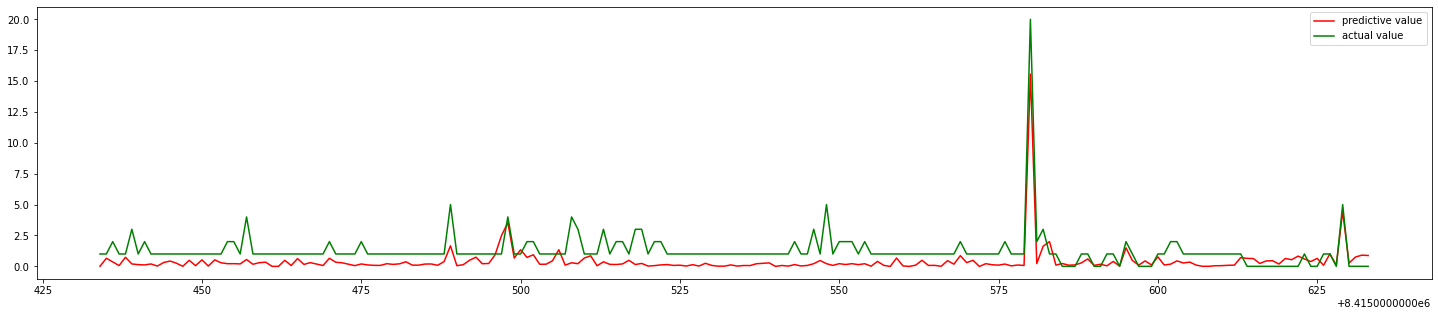

In [13]:
submission = pd.DataFrame({
    "ID": X_valid.index, 
    "item_cnt_month": Y_pred
})
x = submission['ID'].head(200)
y_pred = submission['item_cnt_month'].head(200)
y_true = Y_valid.head(200)
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(111)
ax.plot(x, y_pred, label = 'predictive value', color = 'red')
ax.plot(x, y_true, label = 'actual value', color = 'green')

ax.legend()

plt.show()

In [14]:
Y_test = model.predict(X_test)

In [15]:
# 제출 파일 생성
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('./submission/submission_CatBoost_2022022802.csv', index=False)